# Convex room RIR calculation

{download}`Download this page as a notebook 🗎 </guides/convex_room.ipynb>`.


Let's calculate the room impulse response (RIR) for a convex room using torchRIR. First let's define a shoebox room as a convex room, given it's vertices.

In [17]:
from torchrir.geometry import ConvexRoom
import torch

x_size = 4.5000
y_size = 2.1500
z_size = 3.3000
points = torch.tensor(
    [
        [-x_size, -y_size, -z_size],
        [-x_size, -y_size, z_size],
        [-x_size, y_size, -z_size],
        [-x_size, y_size, z_size],
        [x_size, -y_size, -z_size],
        [x_size, -y_size, z_size],
        [x_size, y_size, -z_size],
        [x_size, y_size, z_size],
    ]
)

shoebox_room = ConvexRoom(points.T, 0.9)

We can simply visualize the room using matplotlib by calling `.plot()`.

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

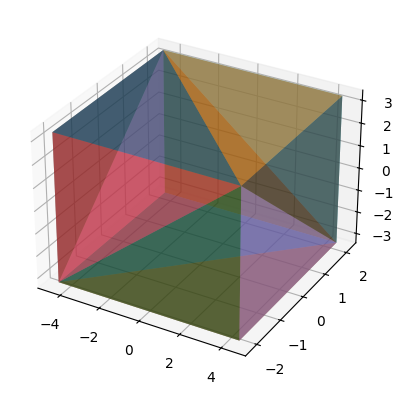

In [18]:
shoebox_room.plot(alpha=0.35)

To compute the RIR, we need to define a sound source. which can be done by specifying the source position in the room.


In [19]:
from torchrir.source import Source


source = Source(position=torch.tensor([0.8, 0.8, 0.8]), intensity=2.0)

Finally the impulse response can be computed by calling the `.computer_rir()` method on the room object, passing the receiver position, the sources, and the sampling frequency, along with other parameters.


In [20]:
from torchrir.geometry import ImpulseResponseStrategies

fs = 48000.0  # Hz
rir = shoebox_room.compute_rir(
    p=torch.tensor([0.2, 0.2, 0.2]),  # receiver position
    s=source,
    k=8,
    fs=fs,
    impulse_response_fn=ImpulseResponseStrategies.sinc,
)

Reflection 0, reflecting...
Reflection 0, adding 12 impulse responses...
Reflection 1, reflecting...
Reflection 1, adding 72 impulse responses...
Reflection 2, reflecting...
Reflection 2, adding 427 impulse responses...
Reflection 3, reflecting...
Reflection 3, adding 2331 impulse responses...
Reflection 4, reflecting...
Reflection 4, adding 12995 impulse responses...
Reflection 5, reflecting...
Reflection 5, adding 70795 impulse responses...
Reflection 6, reflecting...
Reflection 6, adding 383771 impulse responses...
Reflection 7, reflecting...
Reflection 7, adding 2056111 impulse responses...


We can visualize the RIR in the time domain and in the frequency domain using matplotlib, as below.

AttributeError: 'Tensor' object has no attribute 'nump'

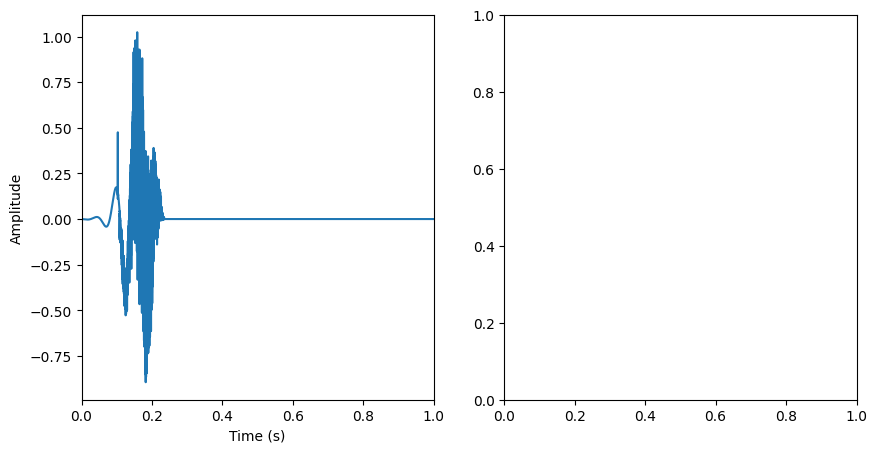

In [ ]:
import matplotlib.pyplot as plt
import scipy

fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(rir[1], rir[0])
plt.xlim([0, 1])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(1, 2, 2)
H = abs(scipy.fft.fft(rir[0].numpy()))
f = scipy.fft.fftfreq(len(H), 1 / fs)
plt.loglog(f, H)
plt.xlim([1, fs / 2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.tight_layout()

The impulse response can also be heard below.

In [ ]:
import IPython
import wave

with wave.open("_output.wav", "w") as wf:
    wf.setnchannels(1)  # Mono
    wf.setsampwidth(2)  # 2 bytes per sample (16-bit PCM)
    wf.setframerate(1 / (rir[1][1] - rir[1][0]).numpy())
    wf.writeframes(rir[0].numpy().tobytes())

IPython.display.Audio("_output.wav")